In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fullok/problems/occlusion2_rec.svg
/kaggle/input/fullok/problems/frag1.svg
/kaggle/input/fullok/problems/occlusion1_rec.svg
/kaggle/input/fullok/problems/isolated_sol.csv
/kaggle/input/fullok/problems/occlusion2_sol_rec.svg
/kaggle/input/fullok/problems/occlusion1_sol_rec.png
/kaggle/input/fullok/problems/isolated_sol.svg
/kaggle/input/fullok/problems/frag2_sol.csv
/kaggle/input/fullok/problems/frag0.csv
/kaggle/input/fullok/problems/occlusion2_sol_rec.png
/kaggle/input/fullok/problems/occlusion2.svg
/kaggle/input/fullok/problems/occlusion1_sol.csv
/kaggle/input/fullok/problems/occlusion1.svg
/kaggle/input/fullok/problems/frag2.svg
/kaggle/input/fullok/problems/occlusion2_sol.csv
/kaggle/input/fullok/problems/isolated.svg
/kaggle/input/fullok/problems/occlusion1.csv
/kaggle/input/fullok/problems/frag0.svg
/kaggle/input/fullok/problems/frag2_sol.svg
/kaggle/input/fullok/problems/frag01_sol.csv
/kaggle/input/fullok/problems/occlusion1_sol_rec.svg
/kaggle/input/fullok/proble

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.special import comb
!pip install scipy

In [3]:
frag0=pd.read_csv('/kaggle/input/fullok/problems/frag0.csv',header=None)
frag0.columns=['col1','col2','col3','col4']
f2=pd.read_csv('/kaggle/input/fullok/problems/frag2.csv',header=None)
f2.columns=['col1','col2','col3','col4']
iso=pd.read_csv('/kaggle/input/fullok/problems/isolated.csv',header=None)
iso.columns=['col1','col2','col3','col4']
iso0=np.array(iso[iso['col1']==0][['col3','col4']])
iso1=np.array(iso[iso['col1']==1][['col3','col4']])
iso2=np.array(iso[iso['col1']==2][['col3','col4']])
im0=np.array(frag0[frag0['col1']==0][['col3','col4']])
im1=np.array(frag0[frag0['col1']==1][['col3','col4']])
im2=np.array(frag0[frag0['col1']==2][['col3','col4']])
im3=np.array(frag0[frag0['col1']==3][['col3','col4']])
im4=np.array(frag0[frag0['col1']==4][['col3','col4']])
im5=np.array(frag0[frag0['col1']==5][['col3','col4']])
im6=np.array(frag0[frag0['col1']==6][['col3','col4']])
im7=np.array(frag0[frag0['col1']==7][['col3','col4']])
im8=np.array(frag0[frag0['col1']==8][['col3','col4']])
im9=np.array(frag0[frag0['col1']==9][['col3','col4']])

In [4]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.special import comb

In [5]:
import numpy as np
from numpy.linalg import norm, lstsq

In [6]:
def close_polyline(points):
    
    if len(points) == 0:
        return points
    
    if not np.array_equal(points[0], points[-1]):
        points = np.vstack([points, points[0]])
    
    return points

In [7]:
import matplotlib.pyplot as plt

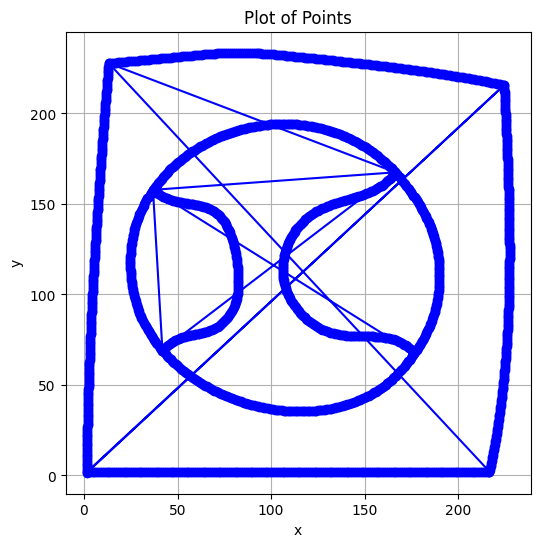

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(frag0['col3'], frag0['col4'], marker='o', linestyle='-', color='b')
plt.title('Plot of Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

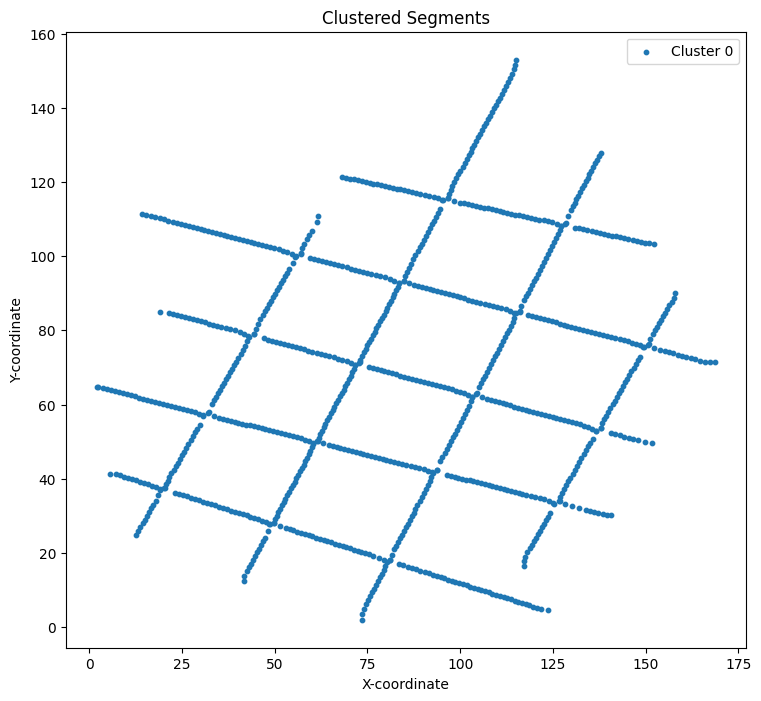

Cluster 0: Segments [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]


In [27]:
# inputd=f2[['col1','col3','col4']]
# import numpy as np
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt

# def segment_into_drawings(points_with_segments, eps=5, min_samples=5):
#     """
#     Segments a set of points into clusters using DBSCAN and identifies segment IDs in each cluster.
    
#     Parameters:
#         points_with_segments (numpy.ndarray): Array containing segment IDs, x, and y coordinates.
#         eps (float): The maximum distance between two points for them to be considered as in the same neighborhood.
#         min_samples (int): The number of points in a neighborhood for a point to be considered as a core point.
    
#     Returns:
#         dict: A dictionary where the key is the cluster label and the value is a list of unique segment IDs in that cluster.
#     """
#     segment_ids = points_with_segments[:, 0]
#     points = points_with_segments[:, 1:]  # Extract x and y coordinates
    
#     clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
#     labels = clustering.labels_
#     unique_labels = set(labels)
    
#     cluster_segments_info = {}
    
#     plt.figure(figsize=(12, 8))
    
#     for label in unique_labels:
#         if label == -1:
#             continue  # Ignore noise
        
#         cluster_mask = (labels == label)
#         cluster_points = points_with_segments[cluster_mask]
        
#         # Plot the cluster points
#         plt.scatter(cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}', s=10)
        
#         # Extract unique segment IDs in the cluster
#         unique_segments = np.unique(cluster_points[:, 0])
#         cluster_segments_info[label] = unique_segments
    
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.title('Clustered Segments')
#     plt.xlabel('X-coordinate')
#     plt.ylabel('Y-coordinate')
#     plt.legend(loc='best')
#     plt.show()
    
#     return cluster_segments_info

# # Example usage:

# # Assume `f2` is your DataFrame containing 'segment_id', 'col3' (x), and 'col4' (y)
# # Convert it to a numpy array with segment ID, x, and y coordinates
# points_with_segments = np.array(inputd)

# # Segment the points into clusters and extract the segment information
# cluster_segments_info = segment_into_drawings(points_with_segments, eps=5, min_samples=5)

# # Print the segments in each cluster
# for cluster_label, segments in cluster_segments_info.items():
#     print(f"Cluster {cluster_label}: Segments {segments}")
# allclu=[]
# for cluster in cluster_segments_info:
#     clus=[]
#     for val in cluster_segments_info[cluster]:
#         points=np.array(frag0[frag0['col1']==val][['col3','col4']])
#         clus.append(points)
#     allclu.append(clus) 

In [12]:
def reshape_segments_to_points(segments):
        """Reshape a list of segments where each segment is an array of [x, y] points into a single 2D numpy array."""
        points = np.concatenate(segments, axis=0)
        return points

In [100]:
# def is_closed_figure(points, tolerance=1e-1):
    
#     # Ensure the points are in the correct format
#     points = np.array(points)
    
#     # Check if the first and last points are the same within the given tolerance
#     distance = np.linalg.norm(points[0] - points[-1])
#     return distance <= tolerance

In [13]:
def lcerchecker(segments):
#line , circle, ellipse, rectangle checker ............

    from scipy.special import comb
    import numpy as np
    from numpy.linalg import norm
    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse, Rectangle

    def bezier_curve(t, points):
        """Calculate a point on a Bézier curve."""
        n = len(points) - 1
        return sum(comb(n, i) * (1 - t) ** (n - i) * t ** i * points[i] for i in range(n + 1))

    def distance_to_segment(p, v1, v2):
        """Calculate the distance from point p to the line segment (v1, v2)."""
        line_vec = v2 - v1
        p_vec = p - v1
        line_len = norm(line_vec)
        line_unitvec = line_vec / line_len
        projection = np.dot(p_vec, line_unitvec)
        if projection < 0:
            closest_point = v1
        elif projection > line_len:
            closest_point = v2
        else:
            closest_point = v1 + projection * line_unitvec
        return norm(p - closest_point)

    def fit_line(points):
        """Fit a line to the given points and return the error and model."""
        if len(points) < 2:
            return float('inf'), None
        X = points[:, 0].reshape(-1, 1)
        y = points[:, 1]
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        print("line",mse)
        return mse, model

    def fit_rectangle(points, iterations=100):
        """Iteratively fit a rectangle to the given points and return the error and vertices."""
        def rectangle_mse(vertices):
            def point_to_rect_distance(p, rect):
                """Calculate the minimum distance from a point to the edges of a rectangle."""
                x_min, y_min = rect[0]
                x_max, y_max = rect[2]
                distances = [
                    np.abs(p[0] - x_min),  # Left edge
                    np.abs(p[0] - x_max),  # Right edge
                    np.abs(p[1] - y_min),  # Bottom edge
                    np.abs(p[1] - y_max)   # Top edge
                ]
                return min(distances)

            distances = np.array([point_to_rect_distance(p, vertices) for p in points])
            return np.mean(distances ** 2)

        def compute_rectangle_corners(points):
            """Compute a rectangle that bounds the given points."""
            min_x, min_y = np.min(points, axis=0)
            max_x, max_y = np.max(points, axis=0)
            return np.array([
                [min_x, min_y],
                [max_x, min_y],
                [max_x, max_y],
                [min_x, max_y],
                [min_x, min_y]  # close the rectangle
            ])

        vertices = compute_rectangle_corners(points)

        for _ in range(iterations):
            # Perform iterative adjustment to vertices
            vertices += np.random.randn(*vertices.shape) * 0.01  # Random adjustments as a placeholder for gradient descent

        mse = rectangle_mse(vertices)

        # Plot the fitted rectangle
        plt.plot(*np.append(vertices, [vertices[0]], axis=0).T, label='Fitted Rectangle', color='green')
        print("recte",mse)
        return mse, vertices


    def fit_circle(points, iterations=100):
        """Iteratively fit a circle to the given points and return the error and parameters."""
        def circle_mse(center, radius):
            distances = np.array([norm(center - p) for p in points])
            return np.mean((distances - radius) ** 2)

        # Initial guess
        center = np.mean(points, axis=0)
        radius = np.mean([norm(center - p) for p in points])

        for _ in range(iterations):
            # Update radius
            distances = np.array([norm(center - p) for p in points])
            radius = np.mean(distances)

            # Update center
            distances_to_circle = distances - radius
            gradient = np.mean([2 * (center - p) * (distances_to_circle[i] / np.linalg.norm(center - p)) for i, p in enumerate(points)], axis=0)
            center -= 0.1 * gradient  # Adjust learning rate as needed

        mse = circle_mse(center, radius)

        # Plot the fitted circle
        circle = plt.Circle(center, radius, color='orange', fill=False, linestyle='--', label='Fitted Circle')
        plt.gca().add_patch(circle)
        print("circler",mse)
        return mse, (center, radius)


    def fit_ellipse(points, iterations=100):
        """Iteratively fit an ellipse to the given points and return the error and parameters."""

        def ellipse_mse(params, points):
            x0, y0, a, b, theta = params
            cos_theta = np.cos(theta)
            sin_theta = np.sin(theta)
            rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
            transformed_points = np.dot(points - [x0, y0], rotation_matrix)
            distances = (transformed_points[:, 0] / a) ** 2 + (transformed_points[:, 1] / b) ** 2
            mse = np.mean((distances - 1) ** 2)
            return mse
        x_mean, y_mean = np.mean(points, axis=0)
        a_guess = np.ptp(points[:, 0]) / 2
        b_guess = np.ptp(points[:, 1]) / 2
        initial_params = np.array([x_mean, y_mean, a_guess, b_guess, 0])

        for _ in range(iterations):
            # Optimize the ellipse parameters
            A = np.column_stack([
                points[:, 0]**2, 
                points[:, 0] * points[:, 1], 
                points[:, 1]**2, 
                points[:, 0], 
                points[:, 1], 
                np.ones_like(points[:, 0])
            ])
            B = np.ones_like(points[:, 0])
            fit_params, _, _, _ = lstsq(A, B, rcond=None)
            a_fit, b_fit, c_fit, d_fit, e_fit, f_fit = fit_params
            x0 = (b_fit * e_fit - 2 * c_fit * d_fit) / (4 * a_fit * c_fit - b_fit ** 2)
            y0 = (b_fit * d_fit - 2 * a_fit * e_fit) / (4 * a_fit * c_fit - b_fit ** 2)
            numerator = 2 * (a_fit * e_fit ** 2 + c_fit * d_fit ** 2 + f_fit * b_fit ** 2 - 2 * b_fit * d_fit * e_fit - a_fit * c_fit * f_fit)
            denominator1 = (b_fit ** 2 - 4 * a_fit * c_fit) * ((c_fit - a_fit) * np.sqrt(1 + 4 * b_fit ** 2 / ((a_fit - c_fit) ** 2)) - (c_fit + a_fit))
            denominator2 = (b_fit ** 2 - 4 * a_fit * c_fit) * ((a_fit - c_fit) * np.sqrt(1 + 4 * b_fit ** 2 / ((a_fit - c_fit) ** 2)) - (c_fit + a_fit))

            if denominator1 <= 0 or denominator2 <= 0:
                return float('inf'), (None, None, None, None, None)

            a = np.sqrt(numerator / denominator1)
            b = np.sqrt(numerator / denominator2)
            theta = 0.5 * np.arctan(b_fit / (a_fit - c_fit))

            params = np.array([x0, y0, a, b, theta])
            mse = ellipse_mse(params, points)
            initial_params = params
        ellipse = Ellipse((x0, y0), 2 * a, 2 * b, np.degrees(theta), fill=False, color='purple', linestyle='--', label='Fitted Ellipse')
        plt.gca().add_patch(ellipse)
        print("ellipse", mse)

        return mse, (x0, y0, a, b, theta)
    def bezier_curve(t, control_points):
        """Calculate the Bézier curve for a given set of control points and parameter t."""
        n = len(control_points) - 1
        return sum(comb(n, i) * (1 - t) ** (n - i) * t ** i * np.array(control_points[i]) for i in range(n + 1))

    def bezier_curve_error(params, points):
        """Calculate the MSE between the given points and the Bézier curve defined by the control points."""
        num_control_points = len(params) // 2
        control_points = np.array(params).reshape(num_control_points, 2)

        t = np.linspace(0, 1, len(points))
        bezier_points = np.array([bezier_curve(ti, control_points) for ti in t])

        distances = np.linalg.norm(points - bezier_points[:len(points)], axis=1)
        return np.mean(distances ** 2)



    def check_shape_fit(points, error_threshold=10.0):
        """Check which shapes fit the cluster and get errors."""
        errors = {}
        shapes = {
            'line': fit_line(points),
            'rectangle': fit_rectangle(points),
            'circle': fit_circle(points),
            'ellipse': fit_ellipse(points),
    #         'polygon': fit_polygon(points, num_sides=5)  # Example with 5 sides for a pentagon
        }

        for shape, (error, params) in shapes.items():
            if error <= error_threshold:
                errors[shape] = (error, params)
        return errors

    def plot_fitted_shapes(points, errors):
        """Plot the original points and fitted shapes."""
        plt.figure(figsize=(8, 8))

        # Plot original cluster points
        plt.scatter(points[:, 0], points[:, 1], label="Cluster Points", color="blue", marker='o')

        # Ensure that each shape is plotted with trial fits
        if 'line' in errors:
            error, model = errors['line']
            X = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
            y_pred = model.predict(X.reshape(-1, 1))
            plt.plot(X, y_pred, label=f'Fitted Line (Error: {error:.2f})', color="red")

        if 'rectangle' in errors:
            error, vertices = errors['rectangle']
            plt.plot(*np.append(vertices, [vertices[0]], axis=0).T, label=f'Fitted Rectangle (Error: {error:.2f})', color="green")

        if 'circle' in errors:
            error, (center, radius) = errors['circle']
            circle = plt.Circle(center, radius, color='orange', fill=False, linestyle='--', label=f'Fitted Circle (Error: {error:.2f})')
            plt.gca().add_patch(circle)

        if 'ellipse' in errors:
            error, params = errors['ellipse']
            x0, y0, a, b, theta = params
            ellipse = Ellipse((x0, y0), 2 * a, 2 * b, np.degrees(theta), fill=False, color='purple', linestyle='--', label=f'Fitted Ellipse (Error: {error:.2f})')
            plt.gca().add_patch(ellipse)

    

        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend(loc="best")
        plt.title("Shape Fitting Results")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    def reshape_segments_to_points(segments):
        """Reshape a list of segments where each segment is an array of [x, y] points into a single 2D numpy array."""
        points = np.concatenate(segments, axis=0)
        return points

    # Example usage
#     segments = [
#         im0,im1,im2,im4
#     ]
    # cluster_points=reshape_segments_to_points(segments)

    cluster_points = reshape_segments_to_points(segments)

    # Check which shapes fit the cluster and get errors
    shape_fit_errors = check_shape_fit(cluster_points, error_threshold=40)

    # Print the shape fitting errors
#     print("Shape Fit Errors:")
#     for shape, (error, params) in shape_fit_errors.items():
#         print(f"{shape.capitalize()}: Error = {error}, Params = {params}")

    # Plot the original cluster points and fitted shapes
    plot_fitted_shapes(cluster_points, shape_fit_errors)
    return shape_fit_errors
    

In [14]:
def lchecker(segments):
#line , circle, ellipse, rectangle checker ............

    from scipy.special import comb
    import numpy as np
    from numpy.linalg import norm
    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse, Rectangle

    def bezier_curve(t, points):
        """Calculate a point on a Bézier curve."""
        n = len(points) - 1
        return sum(comb(n, i) * (1 - t) ** (n - i) * t ** i * points[i] for i in range(n + 1))

    def distance_to_segment(p, v1, v2):
        """Calculate the distance from point p to the line segment (v1, v2)."""
        line_vec = v2 - v1
        p_vec = p - v1
        line_len = norm(line_vec)
        line_unitvec = line_vec / line_len
        projection = np.dot(p_vec, line_unitvec)
        if projection < 0:
            closest_point = v1
        elif projection > line_len:
            closest_point = v2
        else:
            closest_point = v1 + projection * line_unitvec
        return norm(p - closest_point)

    def fit_line(points):
        """Fit a line to the given points and return the error and model."""
        if len(points) < 2:
            return float('inf'), None
        X = points[:, 0].reshape(-1, 1)
        y = points[:, 1]
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        print("line",mse)
        return mse, model

    def fit_rectangle(points, iterations=100):
        """Iteratively fit a rectangle to the given points and return the error and vertices."""
        def rectangle_mse(vertices):
            def point_to_rect_distance(p, rect):
                """Calculate the minimum distance from a point to the edges of a rectangle."""
                x_min, y_min = rect[0]
                x_max, y_max = rect[2]
                distances = [
                    np.abs(p[0] - x_min),  # Left edge
                    np.abs(p[0] - x_max),  # Right edge
                    np.abs(p[1] - y_min),  # Bottom edge
                    np.abs(p[1] - y_max)   # Top edge
                ]
                return min(distances)

            distances = np.array([point_to_rect_distance(p, vertices) for p in points])
            return np.mean(distances ** 2)

        def compute_rectangle_corners(points):
            """Compute a rectangle that bounds the given points."""
            min_x, min_y = np.min(points, axis=0)
            max_x, max_y = np.max(points, axis=0)
            return np.array([
                [min_x, min_y],
                [max_x, min_y],
                [max_x, max_y],
                [min_x, max_y],
                [min_x, min_y]  # close the rectangle
            ])

        vertices = compute_rectangle_corners(points)

        for _ in range(iterations):
            # Perform iterative adjustment to vertices
            vertices += np.random.randn(*vertices.shape) * 0.01  # Random adjustments as a placeholder for gradient descent

        mse = rectangle_mse(vertices)

        # Plot the fitted rectangle
        plt.plot(*np.append(vertices, [vertices[0]], axis=0).T, label='Fitted Rectangle', color='green')
        print("recte",mse)
        return mse, vertices


    def fit_circle(points, iterations=100):
        """Iteratively fit a circle to the given points and return the error and parameters."""
        def circle_mse(center, radius):
            distances = np.array([norm(center - p) for p in points])
            return np.mean((distances - radius) ** 2)

        # Initial guess
        center = np.mean(points, axis=0)
        radius = np.mean([norm(center - p) for p in points])

        for _ in range(iterations):
            # Update radius
            distances = np.array([norm(center - p) for p in points])
            radius = np.mean(distances)

            # Update center
            distances_to_circle = distances - radius
            gradient = np.mean([2 * (center - p) * (distances_to_circle[i] / np.linalg.norm(center - p)) for i, p in enumerate(points)], axis=0)
            center -= 0.1 * gradient  # Adjust learning rate as needed

        mse = circle_mse(center, radius)

        # Plot the fitted circle
        circle = plt.Circle(center, radius, color='orange', fill=False, linestyle='--', label='Fitted Circle')
        plt.gca().add_patch(circle)
        print("circler",mse)
        return mse, (center, radius)


    def fit_ellipse(points, iterations=100):
        """Iteratively fit an ellipse to the given points and return the error and parameters."""

        def ellipse_mse(params, points):
            x0, y0, a, b, theta = params
            cos_theta = np.cos(theta)
            sin_theta = np.sin(theta)
            rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
            transformed_points = np.dot(points - [x0, y0], rotation_matrix)
            distances = (transformed_points[:, 0] / a) ** 2 + (transformed_points[:, 1] / b) ** 2
            mse = np.mean((distances - 1) ** 2)
            return mse
        x_mean, y_mean = np.mean(points, axis=0)
        a_guess = np.ptp(points[:, 0]) / 2
        b_guess = np.ptp(points[:, 1]) / 2
        initial_params = np.array([x_mean, y_mean, a_guess, b_guess, 0])

        for _ in range(iterations):
            # Optimize the ellipse parameters
            A = np.column_stack([
                points[:, 0]**2, 
                points[:, 0] * points[:, 1], 
                points[:, 1]**2, 
                points[:, 0], 
                points[:, 1], 
                np.ones_like(points[:, 0])
            ])
            B = np.ones_like(points[:, 0])
            fit_params, _, _, _ = lstsq(A, B, rcond=None)
            a_fit, b_fit, c_fit, d_fit, e_fit, f_fit = fit_params
            x0 = (b_fit * e_fit - 2 * c_fit * d_fit) / (4 * a_fit * c_fit - b_fit ** 2)
            y0 = (b_fit * d_fit - 2 * a_fit * e_fit) / (4 * a_fit * c_fit - b_fit ** 2)
            numerator = 2 * (a_fit * e_fit ** 2 + c_fit * d_fit ** 2 + f_fit * b_fit ** 2 - 2 * b_fit * d_fit * e_fit - a_fit * c_fit * f_fit)
            denominator1 = (b_fit ** 2 - 4 * a_fit * c_fit) * ((c_fit - a_fit) * np.sqrt(1 + 4 * b_fit ** 2 / ((a_fit - c_fit) ** 2)) - (c_fit + a_fit))
            denominator2 = (b_fit ** 2 - 4 * a_fit * c_fit) * ((a_fit - c_fit) * np.sqrt(1 + 4 * b_fit ** 2 / ((a_fit - c_fit) ** 2)) - (c_fit + a_fit))

            if denominator1 <= 0 or denominator2 <= 0:
                return float('inf'), (None, None, None, None, None)

            a = np.sqrt(numerator / denominator1)
            b = np.sqrt(numerator / denominator2)
            theta = 0.5 * np.arctan(b_fit / (a_fit - c_fit))

            params = np.array([x0, y0, a, b, theta])
            mse = ellipse_mse(params, points)
            initial_params = params
        ellipse = Ellipse((x0, y0), 2 * a, 2 * b, np.degrees(theta), fill=False, color='purple', linestyle='--', label='Fitted Ellipse')
        plt.gca().add_patch(ellipse)
        print("ellipse", mse)

        return mse, (x0, y0, a, b, theta)
    def bezier_curve(t, control_points):
        """Calculate the Bézier curve for a given set of control points and parameter t."""
        n = len(control_points) - 1
        return sum(comb(n, i) * (1 - t) ** (n - i) * t ** i * np.array(control_points[i]) for i in range(n + 1))

    def bezier_curve_error(params, points):
        """Calculate the MSE between the given points and the Bézier curve defined by the control points."""
        num_control_points = len(params) // 2
        control_points = np.array(params).reshape(num_control_points, 2)

        t = np.linspace(0, 1, len(points))
        bezier_points = np.array([bezier_curve(ti, control_points) for ti in t])

        distances = np.linalg.norm(points - bezier_points[:len(points)], axis=1)
        return np.mean(distances ** 2)



    def check_shape_fit(points, error_threshold=10.0):
        """Check which shapes fit the cluster and get errors."""
        errors = {}
        shapes = {
            'line': fit_line(points),
#             'rectangle': fit_rectangle(points),
#             'circle': fit_circle(points),
#             'ellipse': fit_ellipse(points),
    #         'polygon': fit_polygon(points, num_sides=5)  # Example with 5 sides for a pentagon
        }

        for shape, (error, params) in shapes.items():
            if error <= error_threshold:
                errors[shape] = (error, params)
        return errors

    def plot_fitted_shapes(points, errors):
        """Plot the original points and fitted shapes."""
        plt.figure(figsize=(8, 8))

        # Plot original cluster points
        plt.scatter(points[:, 0], points[:, 1], label="Cluster Points", color="blue", marker='o')

        # Ensure that each shape is plotted with trial fits
        if 'line' in errors:
            error, model = errors['line']
            X = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
            y_pred = model.predict(X.reshape(-1, 1))
            plt.plot(X, y_pred, label=f'Fitted Line (Error: {error:.2f})', color="red")

        if 'rectangle' in errors:
            error, vertices = errors['rectangle']
            plt.plot(*np.append(vertices, [vertices[0]], axis=0).T, label=f'Fitted Rectangle (Error: {error:.2f})', color="green")

        if 'circle' in errors:
            error, (center, radius) = errors['circle']
            circle = plt.Circle(center, radius, color='orange', fill=False, linestyle='--', label=f'Fitted Circle (Error: {error:.2f})')
            plt.gca().add_patch(circle)

        if 'ellipse' in errors:
            error, params = errors['ellipse']
            x0, y0, a, b, theta = params
            ellipse = Ellipse((x0, y0), 2 * a, 2 * b, np.degrees(theta), fill=False, color='purple', linestyle='--', label=f'Fitted Ellipse (Error: {error:.2f})')
            plt.gca().add_patch(ellipse)

    

        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend(loc="best")
        plt.title("Shape Fitting Results")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    def reshape_segments_to_points(segments):
        """Reshape a list of segments where each segment is an array of [x, y] points into a single 2D numpy array."""
        points = np.concatenate(segments, axis=0)
        return points

    # Example usage
#     segments = [
#         im0,im1,im2,im4
#     ]
    # cluster_points=reshape_segments_to_points(segments)

    cluster_points = reshape_segments_to_points(segments)

    # Check which shapes fit the cluster and get errors
    shape_fit_errors = check_shape_fit(cluster_points, error_threshold=20)

    # Print the shape fitting errors
#     print("Shape Fit Errors:")
#     for shape, (error, params) in shape_fit_errors.items():
#         print(f"{shape.capitalize()}: Error = {error}, Params = {params}")

    # Plot the original cluster points and fitted shapes
    plot_fitted_shapes(cluster_points, shape_fit_errors)
    return shape_fit_errors
    

In [35]:
def polychecker(segments):
    #polygon checker................


    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    tlr=5
    # Function to check if points form a regular polygon
    def is_regular_polygon(points, tolerance=tlr):
        def distance(p1, p2):
            return np.linalg.norm(p1 - p2)

        def angle(p1, p2, p3):
            v1 = p2 - p1
            v2 = p3 - p2
            return np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0))

        distances = [distance(points[i], points[(i + 1) % len(points)]) for i in range(len(points))]
        angles = [angle(points[i], points[(i + 1) % len(points)], points[(i + 2) % len(points)]) for i in range(len(points))]

        return (np.std(distances) < tolerance) and (np.std(angles) < tolerance)

    # Function to check if points form a regular star
    def is_regular_star(points, tolerance=tlr):
        def distance(p1, p2):
            return np.linalg.norm(p1 - p2)

        def angle(p1, p2, p3):
            v1 = p2 - p1
            v2 = p3 - p2
            return np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0))

        distances = [distance(points[i], points[(i + 1) % len(points)]) for i in range(len(points))]
        angles = [angle(points[i], points[(i + 1) % len(points)], points[(i + 2) % len(points)]) for i in range(len(points))]

        # A star has alternating distances and angles
        is_star = (np.std(distances) < tolerance) 

        return is_star

    # Example points for a hand-drawn polygon (using float64 for higher precision)
    points = reshape_segments_to_points(segments)
    points = np.array(points)
    points_polygon = points

    # Create a blank image
    img = np.zeros((500, 500, 3), dtype=np.uint8)

    # Draw the points as polylines
    cv2.polylines(img, [points_polygon.reshape((-1, 1, 2)).astype(np.int32)], isClosed=True, color=(255, 255, 255), thickness=2)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding to create a binary image
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Approximate contours to polygons
    epsilon = 0.01 * cv2.arcLength(contours[0], True)
    approx = cv2.approxPolyDP(contours[0], epsilon, True)

    # Draw the approximated polygon
    img_approx = np.zeros((500, 500, 3), dtype=np.uint8)
    cv2.polylines(img_approx, [approx], isClosed=True, color=(0, 255, 0), thickness=2)
    approx_points = approx.reshape(-1, 2)

    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_approx_rgb = cv2.cvtColor(img_approx, cv2.COLOR_BGR2RGB)

    # Display the original and approximated images using matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Hand-Drawn Polygon')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_approx_rgb)
    plt.title('Approximated Polygon')
    plt.axis('off')

    plt.show()

    # Calculate MSE
    def calculate_mse(original_points, approx_points):
        # Ensure the points are in the same order
        if len(original_points) != len(approx_points):
            raise ValueError("Original and approximated points must have the same length")

        # Calculate distances
        distances = np.linalg.norm(original_points - approx_points, axis=1)

        # Calculate MSE
        mse = np.mean(distances ** 2)
        return mse

    # Ensure points are in float64 format for higher precision
    original_points = points.astype(np.float64)
    approximated_points = approx_points.astype(np.float64)

    # Calculate MSE
    # mse = calculate_mse(original_points, approximated_points)
    # print(f"Mean Squared Error (MSE) between the original and approximated polygons: {mse:.6f}")

    # Check for regular polygon or star fitting
    if is_regular_polygon(approximated_points):
        print("The shape can be approximated to a regular polygon.")
        fit_type = 'regular_polygon'
        fit_points = approximated_points
    elif is_regular_star(approximated_points):
        print("The shape can be approximated to a regular star.")
        fit_type = 'regular_star'
        fit_points = approximated_points
    else:
        print("Fit not possible for a regular polygon or star.")
        fit_type = None
        fit_points = None

    # Return fit type and points
    result = {
        'fit_type': fit_type,
        'fit_points': fit_points
    }
    return result


In [16]:
#reorder segments complete 
def tspsegment(cluster):
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import permutations

    def compute_curvature(segment):
        if len(segment) < 3:
            return 0
        p1, p2, p3 = segment[-3], segment[-2], segment[-1]
        ba = p1 - p2
        bc = p3 - p2
        cross_product = np.cross(ba, bc)
        norm_ba = np.linalg.norm(ba)
        norm_bc = np.linalg.norm(bc)
        curvature = np.linalg.norm(cross_product) / (norm_ba * norm_bc) if (norm_ba * norm_bc) != 0 else 0
        return curvature

    def calculate_curvature_at_endpoints(segments):
        curvatures = []
        for segment in segments:
            curvature_start = compute_curvature(segment[:3])  # Start curvature
            curvature_end = compute_curvature(segment[-3:])   # End curvature
            curvatures.append((curvature_start, curvature_end))
        return curvatures

    def construct_curvature_cost_matrix(segments, curvatures):
        n = len(segments)
        cost_matrix = np.zeros((n, n, 4))  # Consider reversed segments

        for i in range(n):
            for j in range(n):
                if i != j:
                    c1_end = curvatures[i][1]
                    c2_start = curvatures[j][0]
                    c2_end = curvatures[j][1]
                    c1_start = curvatures[i][0]

                    # Calculate cost for different combinations of segment order and direction
                    cost_matrix[i][j][0] = abs(c1_end - c2_start)  # Normal to normal
                    cost_matrix[i][j][1] = abs(c1_start - c2_start)  # Reversed s1 to normal s2
                    cost_matrix[i][j][2] = abs(c1_end - c2_end)  # Normal s1 to reversed s2
                    cost_matrix[i][j][3] = abs(c1_start - c2_end)  # Reversed s1 to reversed s2

        return cost_matrix

    def tsp_solver_curvature(cost_matrix):
        n = len(cost_matrix)
        min_cost = float('inf')
        best_sequence = None
        best_orientations = None

        # Generate all possible permutations of the segment indices
        for perm in permutations(range(n)):
            total_cost = 0
            orientations = []

            for i in range(len(perm) - 1):
                j, k = perm[i], perm[i+1]
                # Select the best connection considering all four possible orientations
                costs = cost_matrix[j][k]
                min_connection_cost = min(costs)
                orientation = np.argmin(costs)  # Get the best connection type

                total_cost += min_connection_cost
                orientations.append(orientation)

            # Update if this permutation has the minimum cost so far
            if total_cost < min_cost:
                min_cost = total_cost
                best_sequence = perm
                best_orientations = orientations

        return best_sequence, best_orientations

    def reorder_segments(segments, best_sequence, best_orientations):
        reordered_segments = []

        for i, seg_idx in enumerate(best_sequence):
            segment = segments[seg_idx]

            # Make sure we don't access out of range indices
            if i < len(best_orientations) and best_orientations[i] in [1, 3]:  # If the segment is reversed
                segment = segment[::-1]

            reordered_segments.append(segment)

        return reordered_segments

    def visualize_segments(segments):
        plt.figure(figsize=(8, 6))
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Use different colors for different segments
        for i, segment in enumerate(segments):
            color = colors[i % len(colors)]
            plt.plot(segment[:, 0], segment[:, 1], color=color, marker='o', label=f'Segment {i+1}')

        plt.legend()
        plt.show()

    # Define three segments of points (each segment is a list of [x, y] coordinates)
#     segment1 = np.array([[0.0, 0.0], [1.0, 2.0], [2.0, 4.0], [3.0, 6.0], [4.0, 8.0]])  # Almost a straight line
#     segment2 = np.array([[4.0, 8.0], [5.0, 9.0], [6.0, 10.0], [7.0, 8.0], [8.0, 6.0]])  # Curved downwards
#     segment3 = np.array([[8.0, 6.0], [7.0, 4.0], [6.0, 2.0], [5.0, 1.0], [4.0, 0.0]])   # Curved upwards

    segments = cluster

    # Step 1: Calculate curvature at endpoints
    curvatures = calculate_curvature_at_endpoints(segments)

    # Step 2: Construct the curvature cost matrix
    cost_matrix = construct_curvature_cost_matrix(segments, curvatures)

    # Step 3: Solve the TSP with the curvature-based cost matrix
    best_sequence, best_orientations = tsp_solver_curvature(cost_matrix)

    # Step 4: Reorder the segments based on the TSP solution
    reordered_segments = reorder_segments(segments, best_sequence, best_orientations)

    # Output the reordered segments
    # visualize_segments(reordered_segments)

    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import permutations
    import random

    def compute_curvature(segment):
        if len(segment) < 3:
            return 0
        curvatures = []
        for i in range(len(segment) - 2):
            p1, p2, p3 = segment[i], segment[i+1], segment[i+2]
            ba = p1 - p2
            bc = p3 - p2
            cross_product = np.cross(ba, bc)
            norm_ba = np.linalg.norm(ba)
            norm_bc = np.linalg.norm(bc)
            curvature = np.linalg.norm(cross_product) / (norm_ba * norm_bc) if (norm_ba * norm_bc) != 0 else 0
            curvatures.append(curvature)
        return np.mean(curvatures)

    def calculate_curvature_at_endpoints(segments):
        curvatures = []
        for segment in segments:
            curvature_start = compute_curvature(segment[:3])  # Start curvature
            curvature_end = compute_curvature(segment[-3:])   # End curvature
            curvatures.append((curvature_start, curvature_end))
        return curvatures

    def construct_curvature_cost_matrix(segments, curvatures):
        n = len(segments)
        cost_matrix = np.zeros((n, n, 4))  # Consider reversed segments

        for i in range(n):
            for j in range(n):
                if i != j:
                    c1_end = curvatures[i][1]
                    c2_start = curvatures[j][0]
                    c2_end = curvatures[j][1]
                    c1_start = curvatures[i][0]

                    # Include segment lengths in cost calculation
                    len1 = np.linalg.norm(segments[i][-1] - segments[i][0])
                    len2 = np.linalg.norm(segments[j][-1] - segments[j][0])

                    cost_matrix[i][j][0] = abs(c1_end - c2_start) / (len1 + len2)  # Normal to normal
                    cost_matrix[i][j][1] = abs(c1_start - c2_start) / (len1 + len2)  # Reversed s1 to normal s2
                    cost_matrix[i][j][2] = abs(c1_end - c2_end) / (len1 + len2)  # Normal s1 to reversed s2
                    cost_matrix[i][j][3] = abs(c1_start - c2_end) / (len1 + len2)  # Reversed s1 to reversed s2

        return cost_matrix

    def simulated_annealing(cost_matrix, temperature=1000, cooling_rate=0.003, iterations=1000):
        n = len(cost_matrix)
        current_sequence = list(range(n))
        current_cost = calculate_total_cost(cost_matrix, current_sequence)

        best_sequence = current_sequence
        best_cost = current_cost

        for _ in range(iterations):
            new_sequence = current_sequence[:]
            i, j = random.sample(range(n), 2)
            new_sequence[i], new_sequence[j] = new_sequence[j], new_sequence[i]

            new_cost = calculate_total_cost(cost_matrix, new_sequence)
            cost_diff = new_cost - current_cost

            if cost_diff < 0 or random.uniform(0, 1) < np.exp(-cost_diff / temperature):
                current_sequence = new_sequence
                current_cost = new_cost

                if new_cost < best_cost:
                    best_sequence = new_sequence
                    best_cost = new_cost

            temperature *= 1 - cooling_rate

        return best_sequence

    def calculate_total_cost(cost_matrix, sequence):
        total_cost = 0
        for i in range(len(sequence) - 1):
            total_cost += min(cost_matrix[sequence[i]][sequence[i+1]])
        return total_cost

    def reorder_segments(segments, best_sequence, best_orientations):
        reordered_segments = []

        for i, seg_idx in enumerate(best_sequence):
            segment = segments[seg_idx]

            if i < len(best_orientations) and best_orientations[i] in [1, 3]:  # If the segment is reversed
                segment = segment[::-1]

            reordered_segments.append(segment)

        return reordered_segments

    def visualize_segments(segments):
        plt.figure(figsize=(8, 6))
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Use different colors for different segments
        for i, segment in enumerate(segments):
            color = colors[i % len(colors)]
            plt.plot(segment[:, 0], segment[:, 1], color=color, marker='o', label=f'Segment {i+1}')

        plt.legend()
        plt.show()

    # Define three segments of points (each segment is a list of [x, y] coordinates)
#     segment1 = np.array([[0.0, 0.0], [1.0, 2.0], [2.0, 4.0], [3.0, 6.0], [4.0, 8.0]])  # Almost a straight line
#     segment2 = np.array([[4.0, 8.0], [5.0, 9.0], [6.0, 10.0], [7.0, 8.0], [8.0, 6.0]])  # Curved downwards
#     segment3 = np.array([[8.0, 6.0], [7.0, 4.0], [6.0, 2.0], [5.0, 1.0], [4.0, 0.0]])   # Curved upwards



    # Step 1: Calculate curvature at endpoints
    curvatures = calculate_curvature_at_endpoints(segments)

    # Step 2: Construct the curvature cost matrix
    cost_matrix = construct_curvature_cost_matrix(segments, curvatures)

    # Step 3: Solve the TSP with the curvature-based cost matrix
    best_sequence = simulated_annealing(cost_matrix)

    # Step 4: Reorder the segments based on the TSP solution
    reordered_segments = reorder_segments(segments, best_sequence, [0] * (len(segments) - 1))  # Dummy orientations

    # Output the reordered segments
    visualize_segments(reordered_segments)
    import numpy as np

    def reorder_and_reverse_segments(segments, best_sequence, best_orientations):
        reordered_segments = []

        # Print the best sequence and orientations for debugging
        print("Best Sequence:", best_sequence)
        print("Best Orientations:", best_orientations)

        for i, seg_idx in enumerate(best_sequence):
            segment = segments[seg_idx]

            # Reverse the segment if needed based on orientation
            if i < len(best_orientations):
                orientation = best_orientations[i]
                if orientation == 1:  # Reverse the segment
                    segment = segment[::-1]
                elif orientation == 3:  # Reverse the segment (both)
                    segment = segment[::-1]

            reordered_segments.append(segment)

        return reordered_segments

    def concatenate_segments(segments):
        # Concatenate segments into a single polyline, ensuring continuity
        concatenated_points = []
        for segment in segments:
            concatenated_points.extend(segment)
        return np.array(concatenated_points)

    def write_polyline_to_file(points, filename='polyline_points.txt'):
        with open(filename, 'w') as f:
            for point in points:
                f.write(f"{point[0]}, {point[1]}\n")

    
    reordered_segments = reorder_and_reverse_segments(segments, best_sequence, best_orientations)

    # Concatenate all points into a single polyline
    concatenated_points = concatenate_segments(reordered_segments)

    # Write the concatenated polyline points to a file
    # write_polyline_to_file(concatenated_points)
    import numpy as np
    import matplotlib.pyplot as plt

    def compute_curvature(segment):
        if len(segment) < 3:
            return [0] * len(segment)
        curvatures = []
        for i in range(1, len(segment) - 1):
            p1, p2, p3 = segment[i-1], segment[i], segment[i+1]
            ba = p1 - p2
            bc = p3 - p2
            cross_product = np.cross(ba, bc)
            norm_ba = np.linalg.norm(ba)
            norm_bc = np.linalg.norm(bc)
            curvature = np.linalg.norm(cross_product) / (norm_ba * norm_bc) if (norm_ba * norm_bc) != 0 else 0
            curvatures.append(curvature)
        return [0] + curvatures + [0]

    def segment_curves_by_curvature(points, curvature_threshold):
        curvatures = compute_curvature(points)
        segments = []
        start_idx = 0

        for i in range(1, len(curvatures)):
            if abs(curvatures[i]) > curvature_threshold:
                segments.append(points[start_idx:i+1])
                start_idx = i

        if start_idx < len(points):
            segments.append(points[start_idx:])

        return segments

    def visualize_segments(segments):
        plt.figure(figsize=(10, 6))
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Use different colors for different segments

        for i, segment in enumerate(segments):
            color = colors[i % len(colors)]
            plt.plot(segment[:, 0], segment[:, 1], color=color, marker='o', label=f'Segment {i+1}')

        plt.title("Segmented Curves")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.legend()
        plt.show()

    # Example concatenated points (replace with actual concatenated_points from previous step)


    # Define curvature threshold (you can adjust this value)
    curvature_threshold = 0.1

    # Segment curves based on curvature
    segmentsf = segment_curves_by_curvature(concatenated_points, curvature_threshold)

    # Visualize the segmented curves
    visualize_segments(segmentsf)
    return segmentsf


In [22]:
 def symcheck(points):   
    import numpy as np
    import matplotlib.pyplot as plt
    from shapely.geometry import Polygon
    from shapely.affinity import rotate, scale, translate

    def reflect_polygon(polygon, angle):
        """
        Reflect a polygon across a line defined by angle (in degrees).

        Args:
        polygon (Polygon): Shapely Polygon object.
        angle (float): Angle of the reflection line in degrees.

        Returns:
        Polygon: Reflected Polygon object.
        """
        # Rotate the polygon to align the reflection line with the x-axis
        rotated = rotate(polygon, -angle, origin='centroid')

        # Reflect the rotated polygon across the x-axis
        reflected = scale(rotated, xfact=1, yfact=-1, origin='centroid')

        # Rotate back to the original orientation
        reflected = rotate(reflected, angle, origin='centroid')

        return reflected

    def check_symmetry(polygon, num_angles=360, threshold=0.90):
        """
        Check for symmetry in a polygon.

        Args:
        polygon (Polygon): Shapely Polygon object.
        num_angles (int): Number of angles to test.
        threshold (float): Similarity threshold for symmetry detection.

        Returns:
        list: List of detected symmetry lines as angles in degrees.
        """
        centroid = polygon.centroid
        symmetry_lines = []

        for angle in np.linspace(0, 180, num_angles):
            reflected = reflect_polygon(polygon, angle)

            # Check for similarity
            original_area = polygon.area
            reflected_area = reflected.area
            intersection_area = polygon.intersection(reflected).area

            similarity = intersection_area / original_area

            if similarity > threshold:
                symmetry_lines.append(angle)

        return list(set(symmetry_lines))  # Return unique angles

    def plot_symmetry_detection(polygon, symmetry_lines):
        """
        Plot the polygon with detected symmetry lines.

        Args:
        polygon (Polygon): Shapely Polygon object.
        symmetry_lines (list): List of symmetry lines as angles in degrees.
        """
        x, y = polygon.exterior.xy

        plt.figure(figsize=(8, 8))
        plt.plot(x, y, 'b-', label='Polygon')
        plt.fill(x, y, alpha=0.3)

        centroid = polygon.centroid
        cx, cy = centroid.x, centroid.y

        for angle in symmetry_lines:
            x_vals = [cx - 50 * np.cos(np.radians(angle)), cx + 50 * np.cos(np.radians(angle))]
            y_vals = [cy - 50 * np.sin(np.radians(angle)), cy + 50 * np.sin(np.radians(angle))]
            plt.plot(x_vals, y_vals, 'r--', label=f'Symmetry Line at {angle:.2f}°')

        plt.title('Symmetry Detection')
        plt.legend()
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    # Example polygon (e.g., hexagon)
    
    polygon = Polygon(points)

    # Detect symmetry lines
    symmetry_lines = check_symmetry(polygon)

    # Plot results
    plot_symmetry_detection(polygon, symmetry_lines)


In [23]:
def is_closed_figure(points, tolerance=10):
    
    # Ensure the points are in the correct format
    points = np.array(points)
    
    # Check if the first and last points are the same within the given tolerance
    distance = np.linalg.norm(points[0] - points[-1])
    return distance <= tolerance

In [73]:
inp=frag0

In [83]:
fr=frag0

In [70]:
fr=pd.read_csv('/kaggle/input/fullok/problems/frag0.csv',header=None)
fr.columns=['col1','col2','col3','col4']

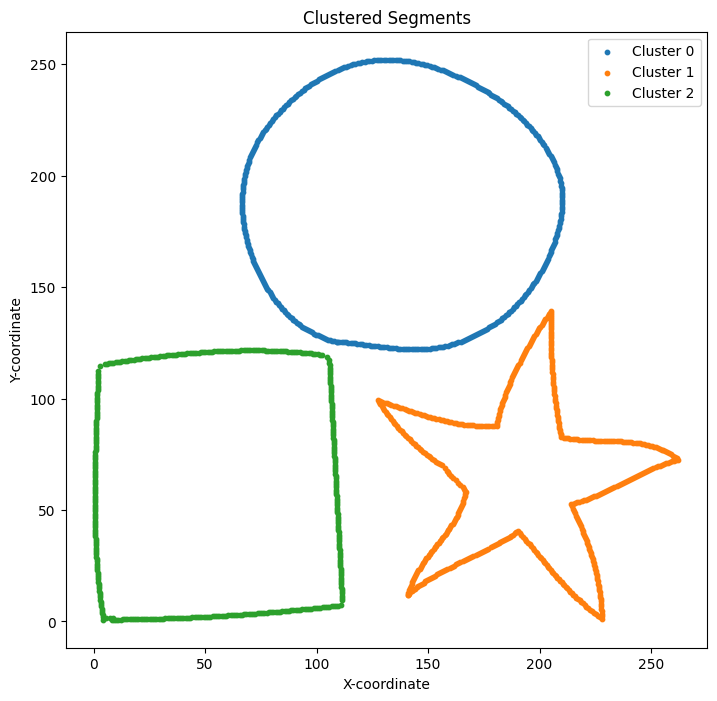

Cluster 0: Segments [0.]
Cluster 1: Segments [1.]
Cluster 2: Segments [2.]


In [117]:
inputd=iso[['col1','col3','col4']]
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def segment_into_drawings(points_with_segments, eps=5, min_samples=5):
    """
    Segments a set of points into clusters using DBSCAN and identifies segment IDs in each cluster.
    
    Parameters:
        points_with_segments (numpy.ndarray): Array containing segment IDs, x, and y coordinates.
        eps (float): The maximum distance between two points for them to be considered as in the same neighborhood.
        min_samples (int): The number of points in a neighborhood for a point to be considered as a core point.
    
    Returns:
        dict: A dictionary where the key is the cluster label and the value is a list of unique segment IDs in that cluster.
    """
    segment_ids = points_with_segments[:, 0]
    points = points_with_segments[:, 1:]  # Extract x and y coordinates
    
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
    labels = clustering.labels_
    unique_labels = set(labels)
    
    cluster_segments_info = {}
    
    plt.figure(figsize=(12, 8))
    
    for label in unique_labels:
        if label == -1:
            continue  # Ignore noise
        
        cluster_mask = (labels == label)
        cluster_points = points_with_segments[cluster_mask]
        
        # Plot the cluster points
        plt.scatter(cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}', s=10)
        
        # Extract unique segment IDs in the cluster
        unique_segments = np.unique(cluster_points[:, 0])
        cluster_segments_info[label] = unique_segments
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Clustered Segments')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend(loc='best')
    plt.show()
    
    return cluster_segments_info

# Example usage:

# Assume `f2` is your DataFrame containing 'segment_id', 'col3' (x), and 'col4' (y)
# Convert it to a numpy array with segment ID, x, and y coordinates
points_with_segments = np.array(inputd)

# Segment the points into clusters and extract the segment information
cluster_segments_info = segment_into_drawings(points_with_segments, eps=5, min_samples=5)

# Print the segments in each cluster
for cluster_label, segments in cluster_segments_info.items():
    print(f"Cluster {cluster_label}: Segments {segments}")
allclu=[]
for cluster in cluster_segments_info:
    clus=[]
    for val in cluster_segments_info[cluster]:
        points=np.array(iso[iso['col1']==val][['col3','col4']])
        clus.append(points)
    allclu.append(clus) 

line 2157.8947780573526
recte 86.16350212716394
circler 6.674181475996424


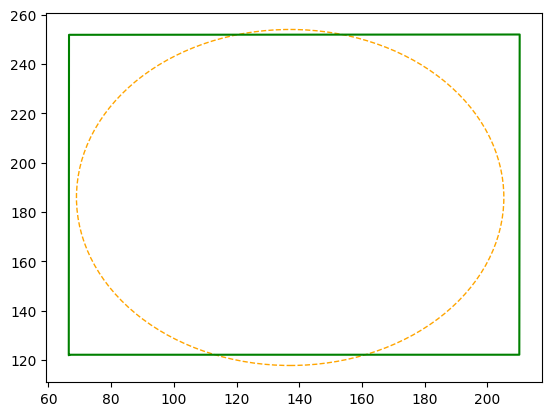

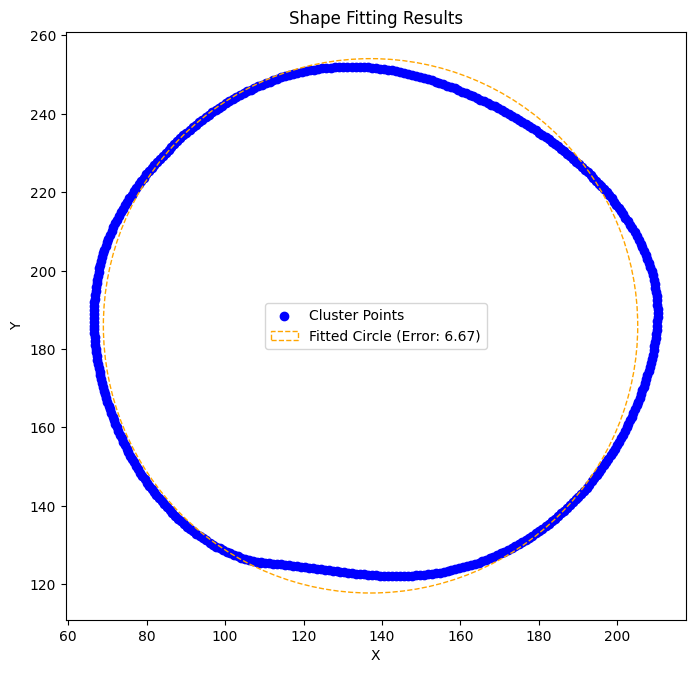

{'circle': (6.674181475996424, (array([137.08855592, 185.92875105]), 68.13670260670382))}


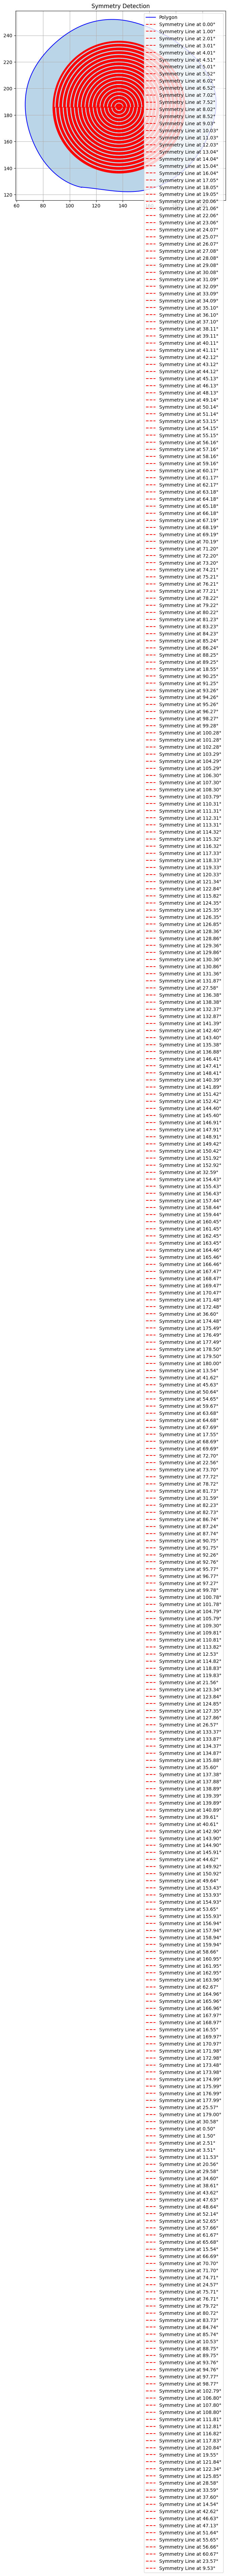

line 1290.8646836082032
recte 786.3185004097945
circler 202.60542519267156


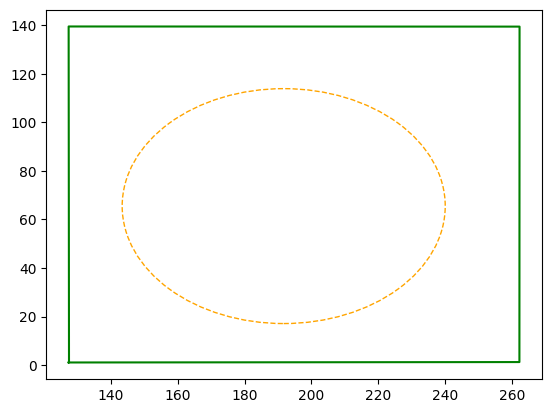

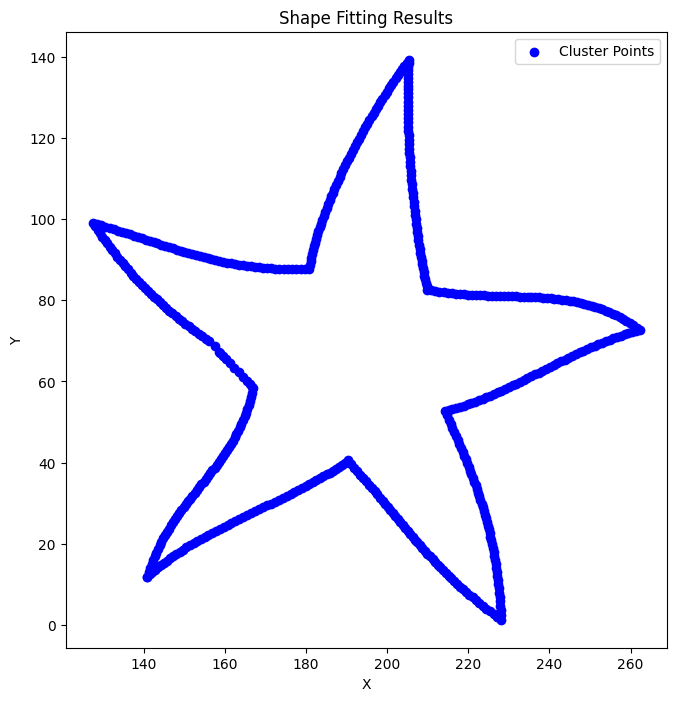

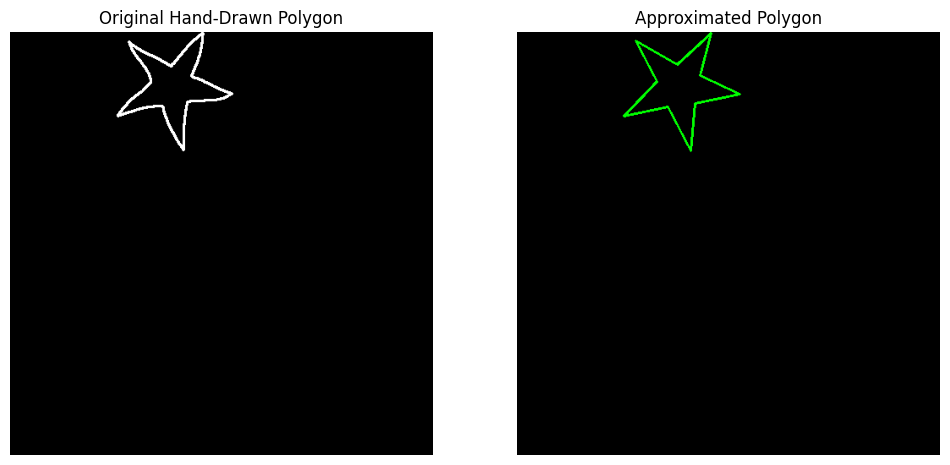

The shape can be approximated to a regular polygon.
{'fit_type': 'regular_polygon', 'fit_points': array([[140.,  10.],
       [165.,  58.],
       [126.,  99.],
       [178.,  88.],
       [205., 140.],
       [210.,  84.],
       [263.,  73.],
       [216.,  51.],
       [229.,   1.],
       [189.,  38.]])}


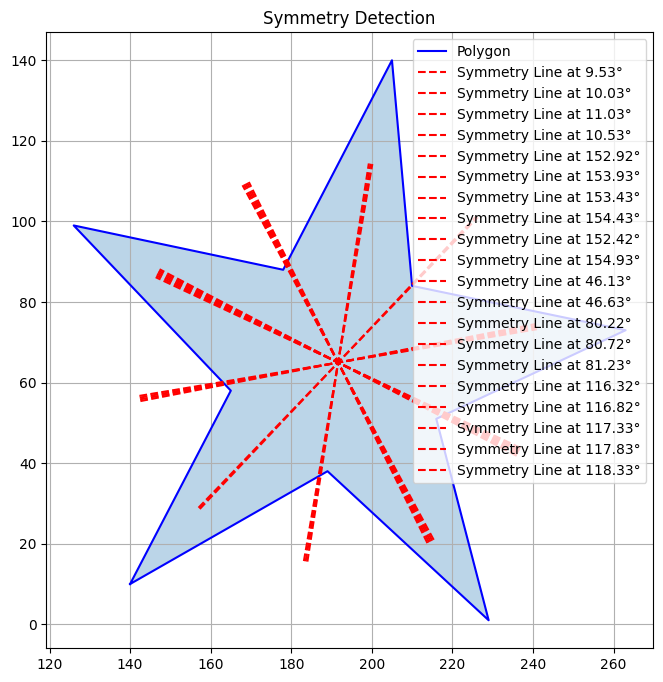

line 2185.609566220268
recte 6.44710327941082
circler 41.36017194025016


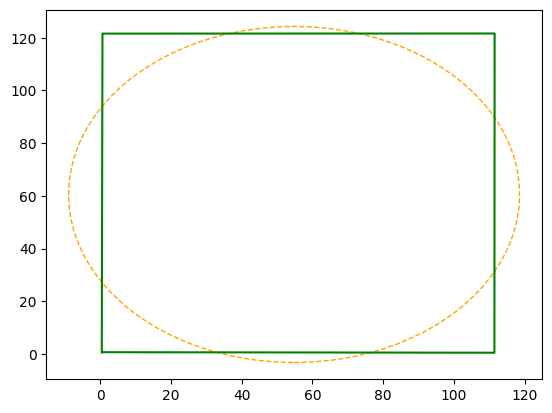

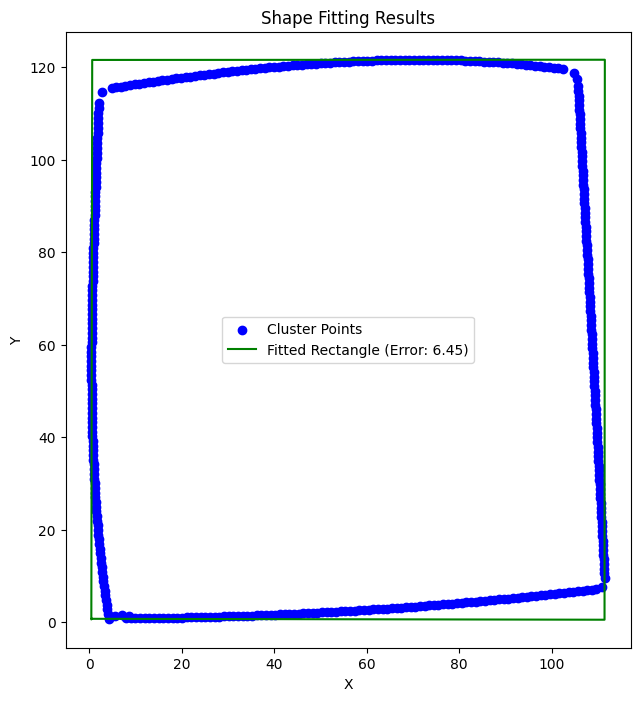

{'rectangle': (6.44710327941082, array([[  0.59858113,   0.73557342],
       [111.44583638,   0.53707882],
       [111.51212436, 121.6211528 ],
       [  0.66669387, 121.57827918],
       [  0.47687353,   0.59900836]]))}


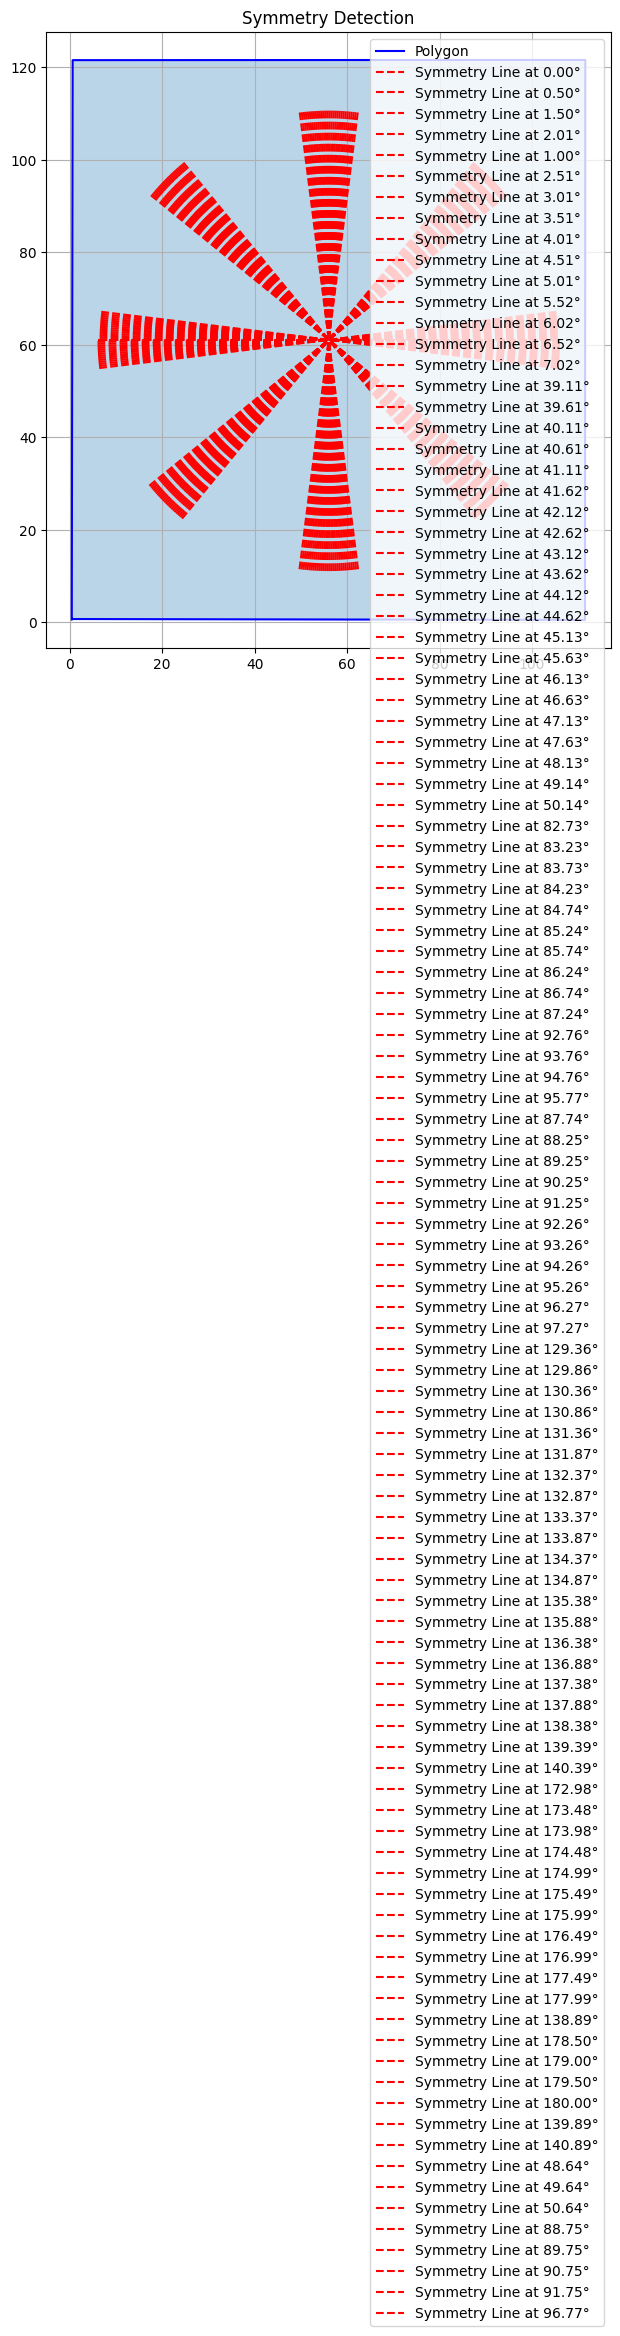

In [118]:
#master code........

for cluster in allclu:
#     points=reshape_segments_to_points(cluster)
    
    
        mydict=lcerchecker(cluster)
        
        if len(mydict)==0:
            polydict=polychecker(cluster)
            
            if polydict['fit_type'] is None:
                segments=tspsegment(cluster)
                for segment in segments:
                    if len(segment)<=2:
                        continue
                    points2=reshape_segments_to_points([segment])
                    if is_closed_figure(points2,tolerance=1e-2)==True:
                        mydict2=lcerchecker([segment])
                        if len(mydict2)==0:
                            polydict2=polychecker([segment])
                            
                            if polydict2['fit_type'] is not None:
                                vertices=polydict2['fit_points']
                                symcheck(vertices)
                                print(vertices,polydict2['fit_type'])
                            
                        else:
                            print(mydict2)
                            symcheck(reshape_segments_to_points([segment]))
                    else:
                        mydict2=lchecker([segment])
                        if len(mydict2)==0:
                            continue;
                        print(mydict2)
                        symcheck(points2)
            else:
                print(polydict)
                symcheck(polydict['fit_points'])
        else:
            print(mydict)
            x=list(mydict.keys())[0]
            if x=='rectangle':
                symcheck(mydict[x][1])
            else:
                symcheck(reshape_segments_to_points(cluster))
                
            
                
                                
                
                
                
            
             
    
        
            
            

In [92]:
pts=reshape_segments_to_points(cluster)

In [93]:
pts

array([[ 13.24499989, 227.75500488],
       [ 13.16392899, 226.75363159],
       [ 13.08298397, 225.75216675],
       ...,
       [214.76663208,   2.10484123],
       [215.77230835,   2.10592055],
       [216.77799988,   2.10700011]])

In [95]:
len(pts)

864

In [96]:
symcheck(pts)

TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x7d6e448252d0>

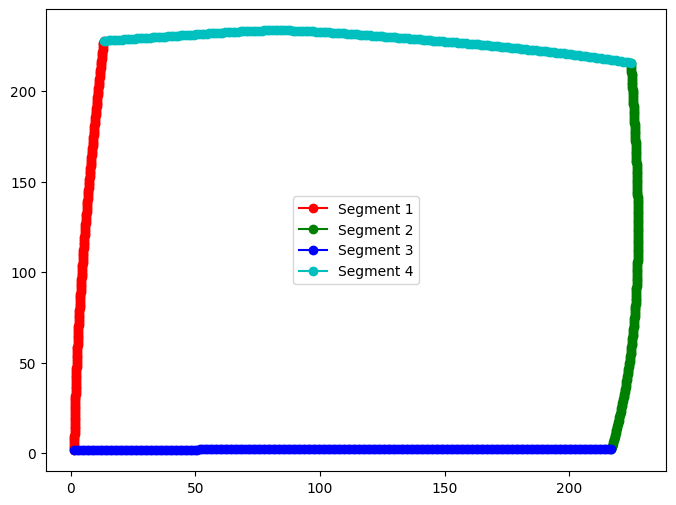

Best Sequence: [0, 2, 3, 1]
Best Orientations: [3, 2, 3]


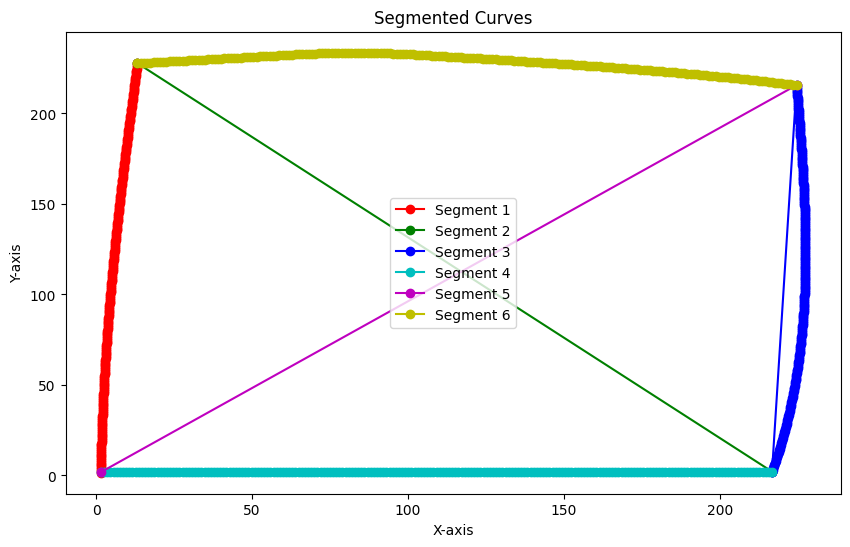

In [97]:
segments2=tspsegment(cluster)

In [ ]:
pts=reshape_segments_to_points(segments2)